# TDO NOTEBOOK

## Get the data

In [65]:
import pandas as pd 
import numpy as np 

In [66]:
route=r"C:\Users\nicol\OneDrive\Documentos\VSCLocal\Data\TITULACION"
file_name="Latinobarometro_2023_Eng_Spss_v1_0.csv"
file_path=route+"\\"+file_name
df=pd.read_csv(file_path,sep=';')
display(df.head(5))

C:\Users\nicol\AppData\Local\Temp\ipykernel_10612\2639196672.py:4: DtypeWarning: Columns (273) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path,sep=';')


,NUMINVES,IDENPA,NUMENTRE,REG,CIUDAD,TAMCIUD,COMDIST,EDAD,SEXO,CODIGO,...,S22.B,S23,S24,REEEDUC.1,REEDUC.2,REEDUC.3,REEDAD,PERPART,FAMPART,WT
0,23,32,1,32001,32001001,8,1,67,2,1,...,-3,-3,3,5,2,-3,4,3,0,",8816327"
1,23,32,2,32001,32001001,8,1,29,2,1,...,-3,-3,3,4,2,-3,2,1,30,",8816327"
2,23,32,3,32001,32001001,8,1,71,1,1,...,-3,-3,3,4,2,-3,4,1,30,",8816327"
3,23,32,4,32001,32001001,8,1,31,1,1,...,-3,-3,3,5,2,-3,2,2,20,",8816327"
4,23,32,5,32001,32001001,8,1,28,1,1,...,-3,8,2,5,5,5,2,1,30,",8816327"


## Filter Data

In [67]:
filtered_col=['IDENPA',
    'SEXO', 'P9STGBS', 'P13STGBS.B', 'P13ST.D', 'P13ST.E', 'P13ST.F', 'P13ST.H',
    'P40STGBS', 'P41ST.A', 'P41ST.H', 'P44ST.B', 'P45ST.A', 'P45S.B', 'P58ST',
    'S2', 'S3', 'S5', 'S6', 'S18.A', 'S20.J', 'REEEDUC.1', 'REEDAD'
]
df_filtered=df[df['IDENPA']==604][filtered_col] 
display(df_filtered.head())

,IDENPA,SEXO,P9STGBS,P13STGBS.B,P13ST.D,P13ST.E,P13ST.F,P13ST.H,P40STGBS,P41ST.A,...,P45S.B,P58ST,S2,S3,S5,S6,S18.A,S20.J,REEEDUC.1,REEDAD
15604,604,2,2,1,3,3,3,3,2,3,...,3,1,3,3,3,4,7,1,7,1
15605,604,1,2,2,3,3,2,3,2,3,...,3,4,3,1,2,-5,7,1,6,1
15606,604,1,2,4,4,4,3,-1,4,4,...,3,4,5,3,4,4,1,2,4,4
15607,604,1,1,4,4,4,4,2,2,2,...,3,4,4,3,3,2,6,2,2,4
15608,604,1,2,3,4,4,4,3,3,2,...,2,4,4,1,2,4,2,1,5,4


## EDA

In [68]:
"""from ydata_profiling import ProfileReport

# Crear un perfil del DataFrame filtrado
profile = ProfileReport(df_filtered, title="Análisis exploratorio - Latinobarómetro 2023", explorative=True)

# Ver el reporte directamente en Jupyter
profile.to_notebook_iframe()

profile.to_file("reporte_latinobarometro.html")"""

'from ydata_profiling import ProfileReport\n\n# Crear un perfil del DataFrame filtrado\nprofile = ProfileReport(df_filtered, title="Análisis exploratorio - Latinobarómetro 2023", explorative=True)\n\n# Ver el reporte directamente en Jupyter\nprofile.to_notebook_iframe()\n\nprofile.to_file("reporte_latinobarometro.html")'

<!-- ## Get the data -->

## Clean Data

In [69]:
# Eliminar campos sin respuesta
df_clean=df_filtered[(df_filtered > 0).all(axis=1)]
print(df_filtered.shape)
print(df_clean.shape)

(1200, 23)
(1040, 23)


In [70]:
# Recodificación de variables
df_clean['genero'] = df_clean['SEXO'].apply(lambda x: 1 if x == 1 else 0) # Man 1 , Woman 0
df_clean['confianza_personas'] = df_clean['P9STGBS'].apply(lambda x: 1 if x == 1 else 0) # One can trust most people 1 , else 0
df_clean['confianza_policia'] = df_clean['P13STGBS.B'].apply(lambda x: 1 if x in [1, 2] else 0) # A lot or some 1, else 0
df_clean['confianza_congreso'] = df_clean['P13ST.D'].apply(lambda x: 1 if x in [1, 2] else 0) # A lot or some 1, else 0
df_clean['confianza_gobierno'] = df_clean['P13ST.E'].apply(lambda x: 1 if x in [1, 2] else 0) # A lot or some 1, else 0
df_clean['confianza_tribunales'] = df_clean['P13ST.F'].apply(lambda x: 1 if x in [1, 2] else 0) # A lot or some 1, else 0
df_clean['confianza_elecciones'] = df_clean['P13ST.H'].apply(lambda x: 1 if x in [1, 2] else 0) # A lot or some 1, else 0
df_clean['interes_politica'] = df_clean['P40STGBS'].apply(lambda x: 1 if x in [1, 2] else 0) # Fully guaranteed or Somewhat guaranteed 1 , else 0
df_clean['libertad_organizacion'] = df_clean['P41ST.A'].apply(lambda x: 1 if x in [1, 2] else 0) # Fully guaranteed or Somewhat guaranteed 1 , else 0
df_clean['libertad_expresion'] = df_clean['P41ST.H'].apply(lambda x: 1 if x in [1, 2] else 0) # Fully guaranteed or Somewhat guaranteed 1 , else 0
df_clean['trabajo_comunidad'] = df_clean['P44ST.B'].apply(lambda x: 1 if x in [1, 2] else 0) # Very frequently or Frequently 1 , else 0
df_clean['firmo_peticion'] = df_clean['P45ST.A'].apply(lambda x: 1 if x in [1, 2] else 0) # Have ever done or would ever done 1 , else 0
df_clean['manifestacion_autorizada'] = df_clean['P45S.B'].apply(lambda x: 1 if x in [1, 2] else 0) # Have ever done or would ever done 1 , else 0
df_clean['victima_delito'] = df_clean['P58ST'].apply(lambda x: 1 if x in [1, 2, 3] else 0) # You, Relative or both 1 , else 0
df_clean['inseguridad_alimentaria'] = df_clean['S3'].apply(lambda x: 1 if x in [3, 4] else 0) # Often or sometiems 1, else 0
df_clean['suficiencia_dinero'] = df_clean['S5'].apply(lambda x: 1 if x in [1, 2] else 0) # Enought or just enough 1, else 0
df_clean['recibe_subsidio'] = df_clean['S6'].apply(lambda x: 1 if x in [1, 2, 3] else 0) # Yes 1, else 0
df_clean['empleado'] = df_clean['S18.A'].apply(lambda x: 1 if x in [1, 2, 3, 4] else 0) # Self-employed , salaried employee , temporary out of work 1, else 0
df_clean['internet'] = df_clean['S20.J'].apply(lambda x: 1 if x == 1 else 0) # Yes 1 , No 0
df_clean['nivel_educación']=df_clean['REEEDUC.1'] 
df_clean['edad']=df_clean['REEDAD']
df_clean['clase_social']=df_clean['S2']




C:\Users\nicol\AppData\Local\Temp\ipykernel_10612\1357824564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['genero'] = df_clean['SEXO'].apply(lambda x: 1 if x == 1 else 0) # Man 1 , Woman 0
C:\Users\nicol\AppData\Local\Temp\ipykernel_10612\1357824564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['confianza_personas'] = df_clean['P9STGBS'].apply(lambda x: 1 if x == 1 else 0) # One can trust most people 1 , else 0
C:\Users\nicol\AppData\Local\Temp\ipykernel_10612\1357824564.py:4:

In [71]:
columnas_recod = [
    'confianza_gobierno',
    'confianza_policia',
    'confianza_congreso',
    'confianza_tribunales',
    'confianza_elecciones',
    'confianza_personas',
    'edad',
    'genero',
    'nivel_educación',
    'suficiencia_dinero',
    'clase_social',
    'recibe_subsidio',
    'empleado',
    'internet',
    'interes_politica',
    'libertad_organizacion',
    'libertad_expresion',
    'victima_delito',
    'inseguridad_alimentaria',
    'firmo_peticion',
    'manifestacion_autorizada',
    'trabajo_comunidad'
]

df_recod = df_clean[columnas_recod]

In [72]:
display(df_recod)

,confianza_gobierno,confianza_policia,confianza_congreso,confianza_tribunales,confianza_elecciones,confianza_personas,edad,genero,nivel_educación,suficiencia_dinero,...,empleado,internet,interes_politica,libertad_organizacion,libertad_expresion,victima_delito,inseguridad_alimentaria,firmo_peticion,manifestacion_autorizada,trabajo_comunidad
15604,0,1,0,0,0,0,1,0,7,0,...,0,1,1,0,1,1,1,0,0,1
15607,0,0,0,0,1,1,4,1,2,0,...,0,0,1,1,1,0,1,1,0,1
15608,0,0,0,0,0,0,4,1,5,1,...,1,1,0,1,1,0,0,1,1,1
15609,0,0,0,0,1,0,3,1,7,1,...,1,1,1,0,0,1,0,1,1,1
15610,0,0,0,0,0,0,2,0,5,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16798,0,1,0,1,1,0,2,0,7,1,...,1,1,0,1,1,1,0,0,1,0
16799,0,0,0,0,0,0,2,0,7,1,...,0,1,0,1,1,0,0,0,0,0
16800,0,0,0,0,0,0,1,1,7,0,...,1,0,1,1,0,0,0,0,0,0
16801,0,0,0,1,0,0,1,1,6,1,...,1,1,0,0,0,1,0,0,0,1


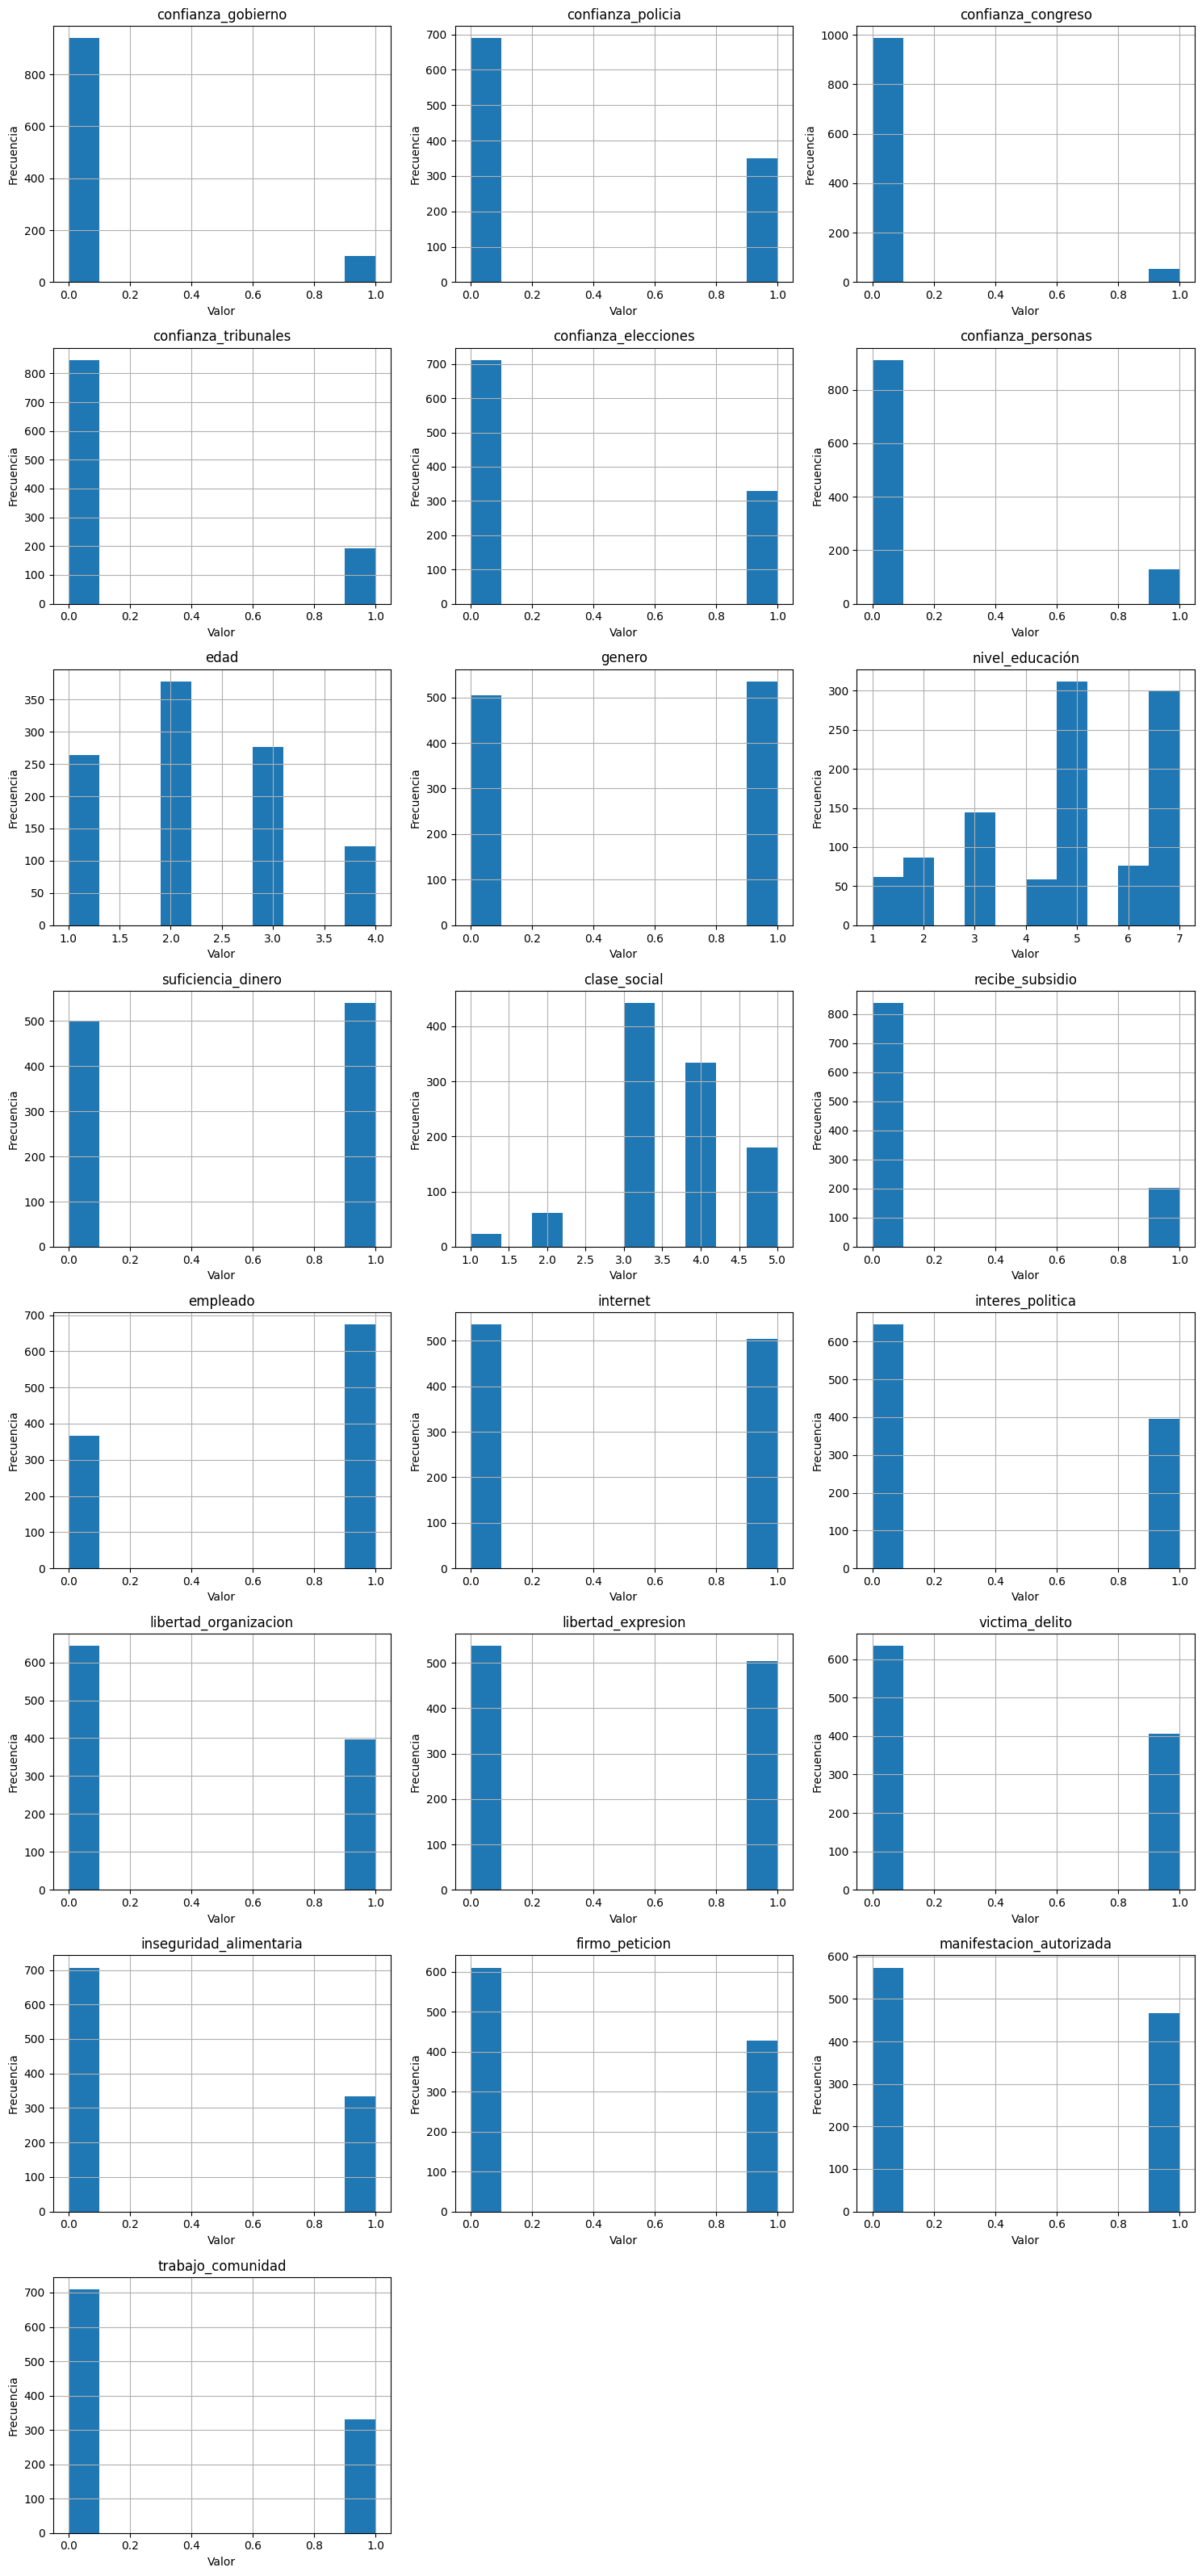

In [ ]:
import matplotlib.pyplot as plt

# Ajustar el número de columnas por fila
n_cols = 3
n_rows = (len(df_recod.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(df_recod.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    df_recod[col].hist() 
    plt.title(col)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [77]:
df_recod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1040 entries, 15604 to 16803
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   confianza_gobierno        1040 non-null   int64
 1   confianza_policia         1040 non-null   int64
 2   confianza_congreso        1040 non-null   int64
 3   confianza_tribunales      1040 non-null   int64
 4   confianza_elecciones      1040 non-null   int64
 5   confianza_personas        1040 non-null   int64
 6   edad                      1040 non-null   int64
 7   genero                    1040 non-null   int64
 8   nivel_educación           1040 non-null   int64
 9   suficiencia_dinero        1040 non-null   int64
 10  clase_social              1040 non-null   int64
 11  recibe_subsidio           1040 non-null   int64
 12  empleado                  1040 non-null   int64
 13  internet                  1040 non-null   int64
 14  interes_politica          1040 non-null 

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

# -------------------------------------
# 1. CARGA DE DATOS
# -------------------------------------
df = df_recod  # <- Reemplaza por el nombre real

# Variables dependientes
dependent_vars = ['firmo_peticion', 'manifestacion_autorizada', 'trabajo_comunidad']

# Variables independientes
X = df.drop(columns=dependent_vars)
feature_names = X.columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------------
# 2. MODELOS
# -------------------------------------
for label in dependent_vars:
    y = df[label]
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    print(f"\n🧪 MODELOS PARA: {label.upper()}\n" + "-"*60)

    # LOGISTIC REGRESSION
    logit = LogisticRegressionCV(cv=5, penalty='l2', solver='lbfgs', max_iter=1000)
    logit.fit(X_train, y_train)
    print("🔹 Regresión Logística:")
    print(classification_report(y_test, logit.predict(X_test)))

    fpr_logit, tpr_logit, _ = roc_curve(y_test, logit.predict_proba(X_test)[:, 1])
    auc_logit = auc(fpr_logit, tpr_logit)

    # LASSO
    lasso = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', max_iter=1000)
    lasso.fit(X_train, y_train)
    print("🔹 LASSO (coeficientes):")
    lasso_coefs = pd.Series(lasso.coef_[0], index=feature_names)
    print(lasso_coefs.sort_values(key=lambda x: -abs(x)))

    # ÁRBOL DE DECISIÓN
    tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
    tree.fit(X_train, y_train)
    print("🔹 Árbol de Decisión:")
    print(classification_report(y_test, tree.predict(X_test)))

    fpr_tree, tpr_tree, _ = roc_curve(y_test, tree.predict_proba(X_test)[:, 1])
    auc_tree = auc(fpr_tree, tpr_tree)

    # -------------------------------------
    # 3. VISUALIZACIONES
    # -------------------------------------
    # ROC
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_logit, tpr_logit, label=f'Logit (AUC = {auc_logit:.2f})')
    plt.plot(fpr_tree, tpr_tree, label=f'Tree (AUC = {auc_tree:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'Curva ROC – {label}')
    plt.xlabel('Tasa Falsos Positivos')
    plt.ylabel('Tasa Verdaderos Positivos')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'roc_{label}.png')
    plt.close()

    # ÁRBOL
    plt.figure(figsize=(16, 6))
    plot_tree(tree, feature_names=feature_names, class_names=['No', 'Sí'],
              filled=True, rounded=True)
    plt.title(f'Árbol de Decisión – {label}')
    plt.tight_layout()
    plt.savefig(f'tree_{label}.png')
    plt.close()



🧪 MODELOS PARA: FIRMO_PETICION
------------------------------------------------------------
🔹 Regresión Logística:
              precision    recall  f1-score   support

           0       0.64      0.88      0.74       178
           1       0.68      0.34      0.45       134

    accuracy                           0.65       312
   macro avg       0.66      0.61      0.60       312
weighted avg       0.66      0.65      0.62       312

🔹 LASSO (coeficientes):
interes_politica           0.277235
genero                     0.218759
edad                      -0.185950
confianza_elecciones       0.171217
internet                   0.165239
libertad_organizacion      0.155439
suficiencia_dinero         0.154614
recibe_subsidio            0.107869
inseguridad_alimentaria    0.100724
confianza_personas        -0.070158
empleado                  -0.058955
confianza_policia         -0.053953
confianza_gobierno         0.040728
libertad_expresion        -0.027296
victima_delito             0.

In [79]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Variables dependientes
dependent_vars = {
    'Sign petition': 'firmo_peticion',
    'Attend demonstration': 'manifestacion_autorizada',
    'Work on community problems': 'trabajo_comunidad'
}

# Contenedor de resultados
summary_table = {}

for label, y_var in dependent_vars.items():
    y = df[y_var]
    X = df.drop(columns=['firmo_peticion', 'manifestacion_autorizada', 'trabajo_comunidad'])
    X = sm.add_constant(X)  # Agrega constante
    model = sm.Logit(y, X).fit(disp=False)

    coef = model.params
    std_err = model.bse
    pvals = model.pvalues

    # Formateamos los resultados con asteriscos
    def format_coef(c, p):
        if p < 0.01:
            return f"{c:.3f}***"
        elif p < 0.05:
            return f"{c:.3f}**"
        elif p < 0.1:
            return f"{c:.3f}*"
        else:
            return f"{c:.3f}"

    formatted = [f"{format_coef(coef[i], pvals[i])}\n({std_err[i]:.4f})" for i in coef.index]
    summary_table[label] = formatted

# Convertimos a DataFrame
summary_df = pd.DataFrame(summary_table, index=coef.index)
summary_df.index.name = "Variable"
summary_df.reset_index(inplace=True)
summary_df


,Variable,Sign petition,Attend demonstration,Work on community problems
0,const,-0.693\n(0.4478),-0.480\n(0.4441),-2.246***\n(0.4716)
1,confianza_gobierno,0.027\n(0.2664),0.102\n(0.2665),0.118\n(0.2702)
2,confianza_policia,0.079\n(0.1520),-0.271*\n(0.1535),-0.318**\n(0.1610)
3,confianza_congreso,-0.255\n(0.3412),-0.130\n(0.3421),0.180\n(0.3432)
4,confianza_tribunales,0.029\n(0.1898),-0.170\n(0.1910),0.213\n(0.1956)
5,confianza_elecciones,0.428***\n(0.1486),0.130\n(0.1502),0.351**\n(0.1535)
6,confianza_personas,-0.202\n(0.2085),0.208\n(0.2068),0.356*\n(0.2082)
7,edad,-0.279***\n(0.0744),-0.232***\n(0.0739),0.171**\n(0.0769)
8,genero,0.425***\n(0.1417),0.315**\n(0.1408),0.145\n(0.1474)
9,nivel_educación,0.025\n(0.0428),0.048\n(0.0422),0.045\n(0.0441)
